# KPMG

# Sprocket Central Pty Ltd
# Data Quality Assessment
# Assessment of data quality and completeness in preparation for analysis

Customer segmentation is a method of dividing customers into groups or clusters on the basis of common characteristics. 

The market researcher can segment customers into the B2C model using various customer's demographic characteristics such as occupation, gender, age, and  location.

In [1]:
pip install openpyxl --upgrade

     |████████████████████████████████| 243 kB 2.8 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd==2.0.0 --upgrade

     |████████████████████████████████| 95 kB 1.6 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from functools import reduce
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import iqr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")
from matplotlib import style
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import normalize
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
plt.rcParams['figure.figsize'] = (12,6)

In [5]:
transactions_dataset = pd.read_excel("../input/kpmg-virtual-internship-program/KPMG.xlsx",engine="openpyxl", sheet_name="Transactions", parse_dates=["transaction_date"])

In [6]:
transactions_dataset.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Delete columns:

In [7]:
transactions_dataset = transactions_dataset.drop(transactions_dataset.iloc[:,13:256], axis=1)

In [8]:
transactions_dataset.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [9]:
transactions_dataset.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [10]:
transactions_dataset.shape

(20000, 13)

In [11]:
transactions_dataset.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [12]:
transactions_dataset.dropna(subset=["transaction_date"], inplace=True)

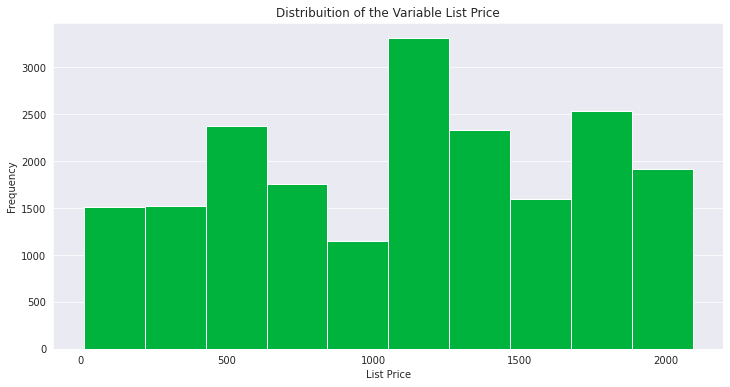

In [13]:
(transactions_dataset["list_price"]).hist(color="#00b33c")
plt.grid(axis="x",alpha=0.75)
plt.xlabel("List Price")
plt.ylabel("Frequency")
plt.title("Distribuition of the Variable List Price")
plt.show()

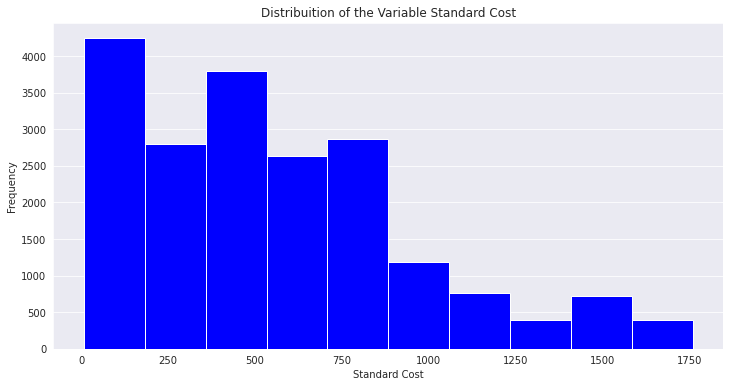

In [14]:
(transactions_dataset["standard_cost"]).hist(color="blue")
plt.grid(axis="x",alpha=0.75)
plt.xlabel("Standard Cost")
plt.ylabel("Frequency")
plt.title("Distribuition of the Variable Standard Cost")
plt.show()

# Skewness:
# It is the degree of distortion from the symmetrical bell curve or the normal distribution. 
# It measures the lack of symmetry in data distribution.
Positive Skewness means when the tail on the right side of the distribution is longer or fatter. 

The mean and median will be greater than the mode.


The skew is in between 0.5 and 1 then slightly skewed :

In [15]:
transactions_dataset["standard_cost"].skew()

0.8641416901835327

Kurtosis is one of the two measures that quantify shape of a distribution. 
kutosis determine the volume of the outlier.
Kurtosis describes the peakedness of the distribution.

In [16]:
transactions_dataset["standard_cost"].kurtosis()

0.2870883801569133

# Detecting the outlier

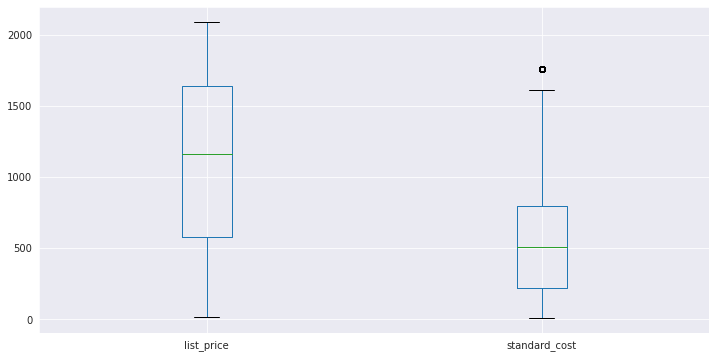

In [17]:
boxplot = transactions_dataset.boxplot(column=["list_price", "standard_cost"])

In [18]:
transactions_dataset[transactions_dataset[("standard_cost")]== 1759.85]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
59,60,60,3473,2017-12-18,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
142,143,60,2135,2017-01-26,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0
291,292,64,3380,2017-10-28,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
412,413,60,720,2017-09-09,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
698,699,60,1535,2017-08-13,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19190,19191,60,3411,2017-06-23,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40410.0
19551,19552,64,844,2017-08-09,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
19705,19706,60,54,2017-10-24,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
19722,19723,60,1841,2017-01-03,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0


In [19]:
mean = np.mean(transactions_dataset["standard_cost"], axis=0)
median = np.nanmedian(transactions_dataset["standard_cost"], axis=0)
sd = np.std(transactions_dataset["standard_cost"], axis=0)

In [20]:
round(mean)

556

In [21]:
round(median)

508

In [22]:
round(sd)

406

The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data. It is a measure of the dispersion similar to standard deviation or variance:

In [23]:
IQR = iqr(transactions_dataset["standard_cost"], rng=(25,75), nan_policy ="omit",interpolation='midpoint')

In [24]:
round(IQR)

580

# List Price :
This is a monetary amount that is based on the list or sales price. Quote, order, and invoice prices are generated from this information.

# Standard Cost: 
This is a monetary amount that is based on the typical cost of the item. Quote, order, and invoice prices are generated from this information.

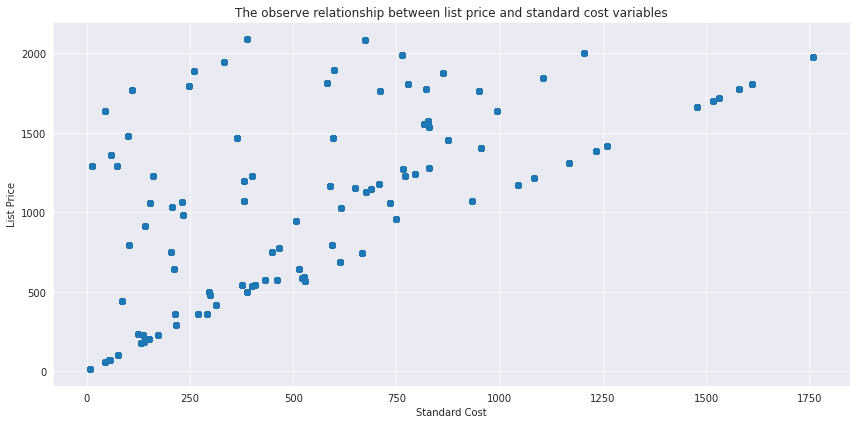

In [25]:
plt.scatter(x=transactions_dataset["standard_cost"], y=transactions_dataset["list_price"])
plt.title("The observe relationship between list price and standard cost variables")
plt.xlabel("Standard Cost")
plt.ylabel("List Price")
plt.tight_layout()
plt.show()

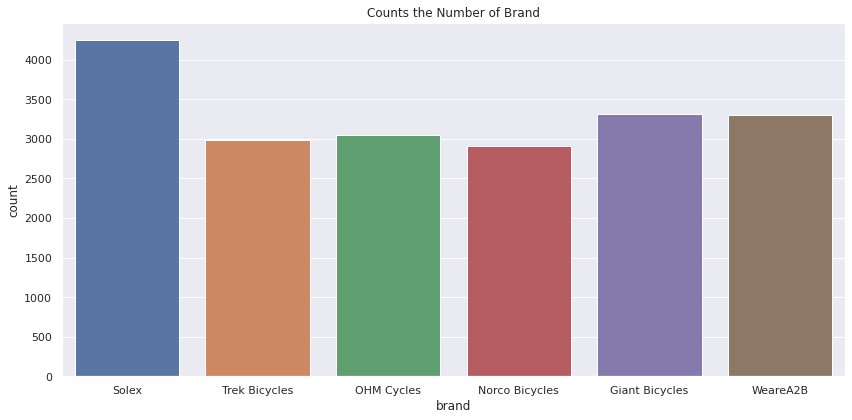

In [26]:
sns.set_theme(style="darkgrid")
sns.countplot(x="brand", data=transactions_dataset)
plt.title("Counts the Number of Brand")
plt.tight_layout()
plt.show()

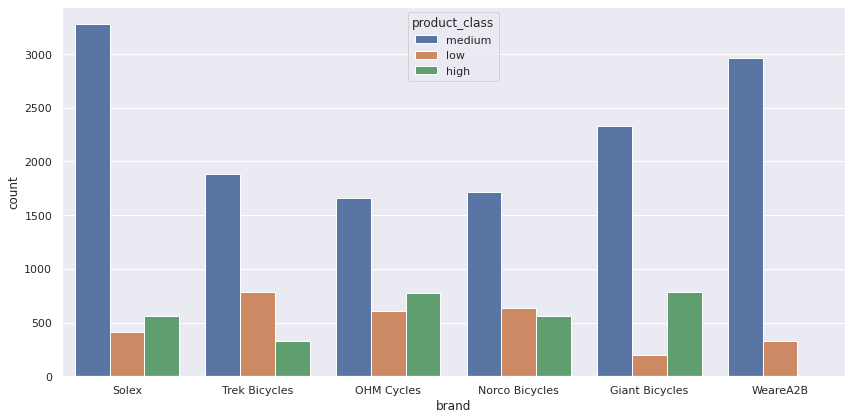

In [27]:
sns.countplot(x="brand",hue="product_class",data=transactions_dataset)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='standard_cost', ylabel='brand'>

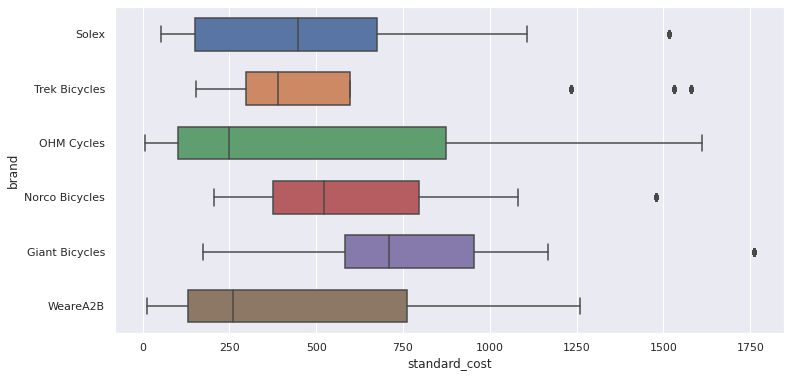

In [28]:
sns.boxplot(x="standard_cost", y="brand", data=transactions_dataset, width=0.6)

In [29]:
date_order = pd.date_range(start="2017-01-01", end="2017-12-30",freq="MS")

In [30]:
date_order

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [31]:
date2_order = pd.date_range(start="2017-01-01",periods=12, freq="MS")


In [32]:
date2_order

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

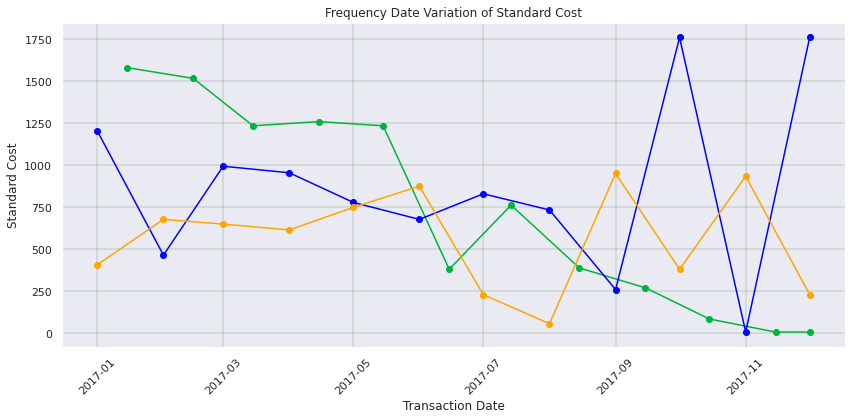

In [33]:
plt.plot_date(transactions_dataset.loc[[5281,17226,19052,18885,1393,3897,18068,11958,14803,4191,10946,8509],
                                       "transaction_date"], 
              transactions_dataset.loc[[5281,17226,19052,18885,1393,3897,18068,11958,14803,4191,10946,8509],
                                       "standard_cost"], 
              linestyle="solid",
              color="#00b33c"
             )
date_order = pd.date_range(start="2017-01-01", end="2017-12-30",freq="MS")
plt.plot_date(date_order, 
              transactions_dataset.loc[[2770,595,622,18541,1455,8380,972,9724,232,4272,18540,6281],
                                       "standard_cost"], 
              linestyle="solid",
              color="blue")

date2_order = pd.date_range(start="2017-01-01",periods=12, freq="MS")
plt.plot_date(date2_order, 
              transactions_dataset.loc[[10065,5127,14784,3943,1015,3447,907,13809,7442,1320,19973,19709],
                                       "standard_cost"], 
              linestyle="solid",
              color="orange")
plt.xticks(rotation=45)
plt.grid(b=True, color='#004d00', linestyle='-', linewidth=0.2)
plt.xlabel("Transaction Date")
plt.ylabel("Standard Cost")
plt.title("Frequency Date Variation of Standard Cost")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='order_status', ylabel='list_price'>

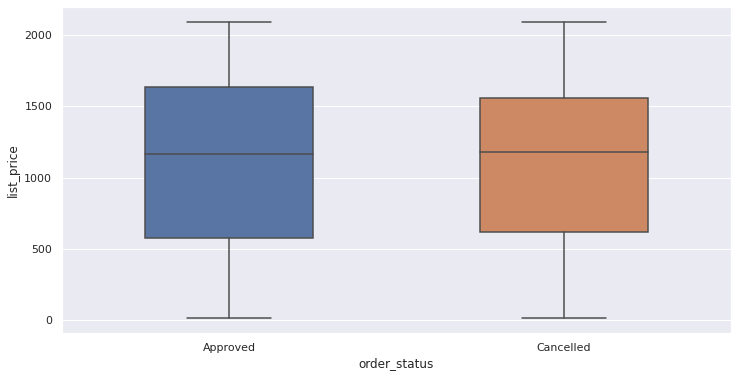

In [34]:
sns.boxplot(x="order_status", y="list_price", data=transactions_dataset, width=0.5)

In [35]:
transactions_dataset["product_class"].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

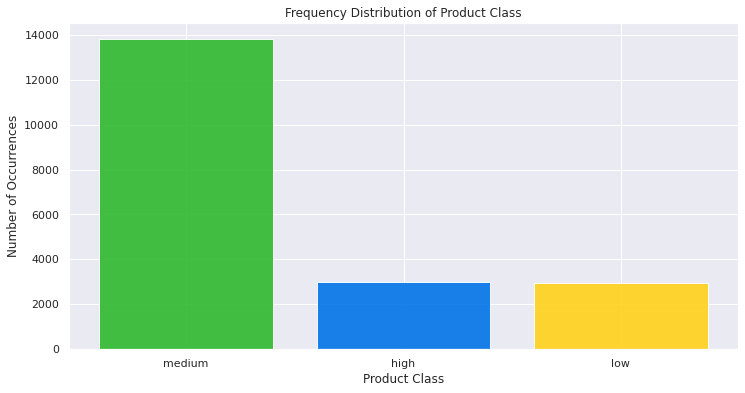

In [36]:
product_class_count = transactions_dataset["product_class"].value_counts()
plt.bar(product_class_count.index, product_class_count.values, color =["#2eb82e","#0073e6","#ffd11a"],alpha=0.9)
plt.title('Frequency Distribution of Product Class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product Class', fontsize=12)
plt.show()

Counting the number of bike and cycling accessories in each cell defined by a combination of brand type and the general order status classification:

In [37]:
pd.crosstab(transactions_dataset.order_status, transactions_dataset.brand)

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
order_status,,,,,,
Approved,3283,2885,3016,4211,2965,3265
Cancelled,29,25,27,42,25,30


# Count missing values for each column of the dataframe transactions dataset:

In [38]:
transactions_dataset.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#  Dropping rows with null values : 

In [39]:
transactions_dataset.dropna(inplace=True, axis=0)

In [40]:
transactions_dataset.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

# To find duplicates values:

In [41]:
transactions_dataset.duplicated().any()

False

# Converting the float to datetime format 


In [42]:
transactions_dataset["product_first_sold_date"] =  pd.to_datetime(transactions_dataset["product_first_sold_date"], format="%Y-%m-%d").dt.date

In [43]:
transactions_dataset["product_first_sold_date"].unique()

array([datetime.date(1970, 1, 1)], dtype=object)

In [44]:
transactions_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [45]:
transactions_dataset.tail(n=5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,1970-01-01


In [46]:
customer_demographic_dataset = pd.read_excel("../input/kpmg-virtual-internship-program/KPMG.xlsx", engine="openpyxl",sheet_name="CustomerDemographic")

In [47]:
customer_demographic_dataset.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
customer_demographic_dataset = customer_demographic_dataset.drop(customer_demographic_dataset.iloc[:,13:256], axis=1)

In [49]:
customer_demographic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [50]:
customer_demographic_dataset.deceased_indicator.value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

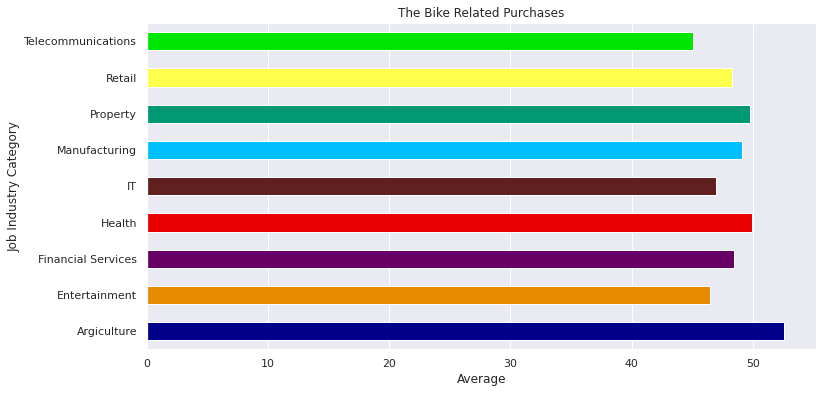

In [51]:
customer_demographic_dataset.groupby("job_industry_category").past_3_years_bike_related_purchases.mean().plot(kind="barh", color=["darkblue","#e68a00","#660066","#e60000","#602020","#00bfff","#009973","#ffff4d","#00e600"])
plt.grid(axis = "y",alpha=0.70)
plt.xlabel("Average")
plt.ylabel("Job Industry Category")
plt.title("The Bike Related Purchases")
plt.show()

In [52]:
customer_demographic_dataset.groupby("job_industry_category").past_3_years_bike_related_purchases.agg(["count","min","max","mean"])

,count,min,max,mean
job_industry_category,,,,
Argiculture,113,2,99,52.610619
Entertainment,136,2,99,46.470588
Financial Services,774,0,99,48.440568
Health,602,0,99,49.923588
IT,223,0,99,46.955157
Manufacturing,799,0,99,49.151439
Property,267,0,99,49.790262
Retail,358,0,99,48.326816
Telecommunications,72,0,98,45.055556


# Drop the column default :

In [53]:
customer_demographic_dataset.drop(["default"], axis=1, inplace=True)

In [54]:
customer_demographic_dataset.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [55]:
customer_demographic_dataset.dropna(axis = 0 ,inplace=True)

In [56]:
customer_demographic_dataset.isnull().values.any()

False

In [57]:
customer_demographic_dataset.duplicated().any()

False

Creating a dictionary using the old values that we want to change as keys and the new values as dictionary values:

In [58]:
gender_dict = {"F":"Female","Femal":"Female","Female":"Female","M":"Male", "Male":"Male","U":"Unknown" }

In [59]:
for keys, values in gender_dict.items():
    print(keys,":", values)

F : Female
Femal : Female
Female : Female
M : Male
Male : Male
U : Unknown


#  Using map() function to change values of the columns gender:

In [60]:
customer_demographic_dataset["gender"] = customer_demographic_dataset["gender"].map(lambda x: gender_dict[x])

In [61]:
customer_demographic_dataset.groupby("gender").past_3_years_bike_related_purchases.agg(["count","min","max","mean"])

,count,min,max,mean
gender,,,,
Female,1446,0,99,48.418396
Male,1333,0,99,50.561140
Unknown,1,59,59,59.000000


In [62]:
customer_demographic_dataset.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [63]:
average_bike_related_purchases = customer_demographic_dataset.groupby(["customer_id","gender","job_title"], as_index=False).past_3_years_bike_related_purchases.mean()
average_bike_related_purchases.sample(n=40)

,customer_id,gender,job_title,past_3_years_bike_related_purchases
2411,3440,Female,Senior Sales Associate,18
775,1086,Male,Statistician IV,84
418,569,Male,Analog Circuit Design manager,30
1280,1796,Female,Desktop Support Technician,79
757,1058,Female,Research Assistant IV,37
1527,2144,Female,Office Assistant IV,12
659,917,Male,VP Product Management,63
1751,2460,Male,Nurse Practicioner,88
1536,2162,Male,Paralegal,49
2392,3415,Male,Quality Engineer,43


In [64]:
customer_demographic_dataset.shape

(2780, 12)

In [65]:
customer_address_dataset = pd.read_excel("../input/kpmg-virtual-internship-program/KPMG.xlsx",engine="openpyxl", sheet_name="CustomerAddress")

In [66]:
customer_address_dataset.head()

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
customer_address_dataset = customer_address_dataset.drop(customer_address_dataset.iloc[:,6:256], axis=1)

In [68]:
customer_address_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [69]:
customer_address_dataset["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

# Creating a dictionary using to remap the values in the state column:

In [70]:
dict = {"New South Wales" : "NSW", "QLD" : "QLD", "VIC" : "VIC", "NSW" : "NSW", "Victoria":"VIC"}

# Remap the values of the state column:

In [71]:
customer_address_dataset["state"] = customer_address_dataset["state"].map(dict)

Property Valuations is a trusted company with a completely independent network of valuers providing property valuations throughout Australia :

In [72]:
customer_address_dataset.groupby("state").property_valuation.agg(["count","min","max","mean"])

,count,min,max,mean
state,,,,
NSW,2140,1,12,8.391589
QLD,838,1,12,5.569212
VIC,1021,1,12,7.272282


In [73]:
customer_address_dataset.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

# Combining Datasets: Merge

In [74]:
dataframes = [transactions_dataset,customer_demographic_dataset,customer_address_dataset]

In [75]:
customers_dataset = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='outer'), dataframes)

In [76]:
customers_dataset.isna().sum()

transaction_id                          512
product_id                              512
customer_id                               0
transaction_date                        512
online_order                            512
order_status                            512
brand                                   512
product_line                            512
product_class                           512
product_size                            512
list_price                              512
standard_cost                           512
product_first_sold_date                 512
first_name                             5978
last_name                              5978
gender                                 5978
past_3_years_bike_related_purchases    5978
DOB                                    5978
job_title                              5978
job_industry_category                  5978
wealth_segment                         5978
deceased_indicator                     5978
owns_car                        

In [77]:
customers_dataset = customers_dataset.dropna(axis=0,how='any',inplace=False)

In [78]:
customers_dataset.isnull().sum().sum()

0

In [79]:
customers_dataset.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

# Iterating the columns

In [80]:
for col in customers_dataset.columns:
    print(col)

transaction_id
product_id
customer_id
transaction_date
online_order
order_status
brand
product_line
product_class
product_size
list_price
standard_cost
product_first_sold_date
first_name
last_name
gender
past_3_years_bike_related_purchases
DOB
job_title
job_industry_category
wealth_segment
deceased_indicator
owns_car
tenure
address
postcode
state
country
property_valuation


In [81]:
customers_dataset.dtypes

transaction_id                                float64
product_id                                    float64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                        object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                                    datetime64[ns]
job_title                   

In [82]:
customers_dataset["DOB"].min()

Timestamp('1843-12-21 00:00:00')

In [83]:
customers_dataset["DOB"].max()

Timestamp('2002-03-11 00:00:00')

In [84]:
customers_dataset2 = customers_dataset[customers_dataset["DOB"]!="1843-12-21"]

In [85]:
customers_dataset2["DOB"].dt.year

0        1955
1        1955
2        1955
3        1979
4        1979
         ... 
19437    1967
19441    1976
19442    1976
19443    1976
19444    1976
Name: DOB, Length: 13628, dtype: int64

# Calculating customers age: 


In [86]:
pd.options.mode.chained_assignment = None 
today = datetime.today()
customers_dataset2.loc[:,"age"] = customers_dataset2.loc[:,"DOB"].apply(lambda x: today.year - x.year - 
                                   ((today.month, today.day) < (x.month, x.day)))

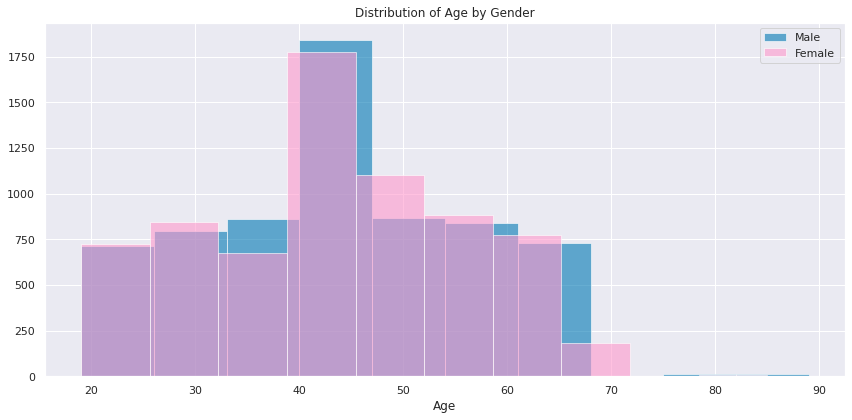

In [87]:
plt.hist("age", data=customers_dataset2[customers_dataset2["gender"] == "Male"], color="#0077b3",alpha=0.6, label="Male");
plt.hist("age", data=customers_dataset2[customers_dataset2["gender"] == "Female"],color="#ff99cc", alpha=0.6, label="Female");
plt.title("Distribution of Age by Gender");
plt.xlabel("Age");
plt.legend();
plt.tight_layout()
plt.show()

# The Count of customers by, id,transaction_date,state, gender and age :

In [88]:
n_by = customers_dataset2.groupby(["customer_id","transaction_date","state","gender","age"])["last_name"].count()
n_by.head(n=40)

customer_id  transaction_date  state  gender  age
1            2017-01-05        NSW    Female  67     1
             2017-02-21        NSW    Female  67     1
             2017-03-27        NSW    Female  67     1
             2017-03-29        NSW    Female  67     1
             2017-04-06        NSW    Female  67     1
             2017-05-11        NSW    Female  67     1
             2017-05-19        NSW    Female  67     1
             2017-06-04        NSW    Female  67     1
             2017-12-09        NSW    Female  67     1
             2017-12-14        NSW    Female  67     1
             2017-12-23        NSW    Female  67     1
2            2017-05-04        NSW    Male    40     1
             2017-06-11        NSW    Male    40     1
             2017-08-24        NSW    Male    40     1
9            2017-02-04        NSW    Female  48     1
             2017-03-06        NSW    Female  48     1
             2017-05-10        NSW    Female  48     1
             20

In [89]:
customers_dataset2 = customers_dataset2[['transaction_id', 'product_id','transaction_date', 'customer_id',
                                         'first_name', 'last_name', 'gender','age','DOB','online_order', 'order_status', 
                                         'brand', 'product_line','product_class', 'product_size', 'list_price', 'standard_cost',
                                        'product_first_sold_date', 'past_3_years_bike_related_purchases', 'job_title','job_industry_category', 
                                         'wealth_segment', 'deceased_indicator','owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
                                         'property_valuation']]

In [90]:
customers_dataset2["property_valuation"] = customers_dataset2["property_valuation"].astype('Int64')

In [91]:
customers_dataset2.shape

(13628, 30)

In [92]:
customers_dataset2.duplicated().any()

False

In [93]:
from pandas import ExcelWriter
from pandas import ExcelFile
customers_dataset4 = ExcelWriter("customers_dataset2.xlsx")
customers_dataset2.to_excel(customers_dataset4,'Sheet1',index=False)
customers_dataset4.save()

# The products purchased by customers.

# Counts the number of bike and cycling accessories by id,order status, name, gender, age, state and brand:

In [94]:
products_purchased_customers = customers_dataset2.groupby(
    ["customer_id","order_status","first_name","last_name","gender","age","state","brand"])["brand"].count()
products_purchased_customers.head(n=40)

customer_id  order_status  first_name  last_name  gender  age  state  brand         
1            Approved      Laraine     Medendorp  Female  67   NSW    Giant Bicycles    4
                                                                      Norco Bicycles    2
                                                                      OHM Cycles        2
                                                                      Solex             2
                                                                      Trek Bicycles     1
2            Approved      Eli         Bockman    Male    40   NSW    Giant Bicycles    1
                                                                      WeareA2B          2
9            Approved      Mala        Lind       Female  48   NSW    Giant Bicycles    1
                                                                      OHM Cycles        1
                                                                      Solex             3
               


# Gender is one of the factors that affects consumer purchasing behaviour

# Counting the number of brand purchasing by gender:


In [95]:
pd.crosstab(customers_dataset2.gender, customers_dataset2.brand)

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
gender,,,,,,
Female,1143,1011,1058,1527,1070,1153
Male,1129,1000,1039,1424,1002,1072


In [96]:
customers_dataset3 = customers_dataset2.drop(columns = ["transaction_id","product_id"],
        inplace = False)

In [97]:
customers_dataset3.info

<bound method DataFrame.info of       transaction_date  customer_id first_name   last_name  gender  age  \
0           2017-02-25         2950    Kristos     Anthony    Male   66   
1           2017-10-16         2950    Kristos     Anthony    Male   66   
2           2017-04-26         2950    Kristos     Anthony    Male   66   
3           2017-05-21         3120     Lauree   O'Donnell  Female   42   
4           2017-10-05         3120     Lauree   O'Donnell  Female   42   
...                ...          ...        ...         ...     ...  ...   
19437       2017-12-03         3446       Gard        Tidy    Male   54   
19441       2017-02-21         3168      Johan  Dudderidge    Male   45   
19442       2017-04-11         3168      Johan  Dudderidge    Male   45   
19443       2017-06-03         3168      Johan  Dudderidge    Male   45   
19444       2017-09-30         3168      Johan  Dudderidge    Male   45   

             DOB  online_order order_status           brand  ...  \

In [98]:
customers_dataset3.columns

Index(['transaction_date', 'customer_id', 'first_name', 'last_name', 'gender',
       'age', 'DOB', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'past_3_years_bike_related_purchases',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

# Customer Segmentation as practice of dividing a customer base into groups of individuals. 
# That are similar in specific way relevant to the marketing team.

Hierarchical clustering is the hierarchical decomposition of the data based on group similarities.


Sample Selection to  Customer Segmentation by State :

In [99]:
X= customers_dataset2.loc[:, ["state","list_price","standard_cost"]]
X.head()

,state,list_price,standard_cost
0,VIC,71.49,53.62
1,VIC,1403.50,954.82
2,VIC,478.16,298.72
3,NSW,2091.47,388.92
4,NSW,1129.13,677.48


In [100]:
X2 = X.loc[:,["list_price", "standard_cost"]]

# Preparing Data for Clusters:

In [101]:
data_normalize = normalize(X2)
data_normalize = pd.DataFrame(data_normalize, columns=X2.columns)
data_normalize.head()

,list_price,standard_cost
0,0.799987,0.600018
1,0.826806,0.562487
2,0.848102,0.529833
3,0.983146,0.182821
4,0.857492,0.514497


In [102]:
data_normalize.index = X[X.columns[0]]

In [103]:
data_normalize.tail()

,list_price,standard_cost
state,,
QLD,0.883284,0.468838
QLD,0.981970,0.189036
QLD,0.951336,0.308157
QLD,0.983146,0.182821
QLD,0.983146,0.182821


# The hierarchical structure of a dendrogram represents the data itself can be judged by the cophenetic correlation coefficient 

The cophenetic correlation for a cluster tree is defined as the linear correlation coefficient between the cophenetic distances obtained from the tree, and the original distances (or dissimilarities) used to construct the tree. Thus, it is a measure of how faithfully the tree represents the dissimilarities among observations.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

The output value, c, is the cophenetic correlation coefficient. The magnitude of this value should be very close to 1 for a high-quality solution. This measure can be used to compare alternative cluster solutions obtained using different algorithms.

Similarity measures 
This will certainly infleence the shape of the clusters.

Valiable Numerical: Use a variation of the Manhattan, City block, or Euclidean distance.

Computing the cophenetic correlation coefficient for the hierarchical cluster tree represented by Z. Z is the output of the linkage function. 
Y contains the distances or dissimilarities used to construct Z, as output by the pdist function:

In [104]:
Y = pdist(data_normalize, 'euclidean');
Z = linkage(Y,'ward');

In [105]:
c = cophenet(Z,Y)
c

(0.8263353870199551,
 array([ 1.51242898,  9.80271574, 30.63013954, ...,  9.95088702,
         9.95088702,  0.        ]))

The cophenetic distances d in the same lower triangular distance vector format as Y:

In [106]:
[c,d] = cophenet(Z,Y)
[c,d]

[0.8263353870199551,
 array([ 1.51242898,  9.80271574, 30.63013954, ...,  9.95088702,
         9.95088702,  0.        ])]

In [107]:
linkage_matrix = hierarchy.linkage(data_normalize,method="ward", metric="euclidean")

# Segmentation Geografic

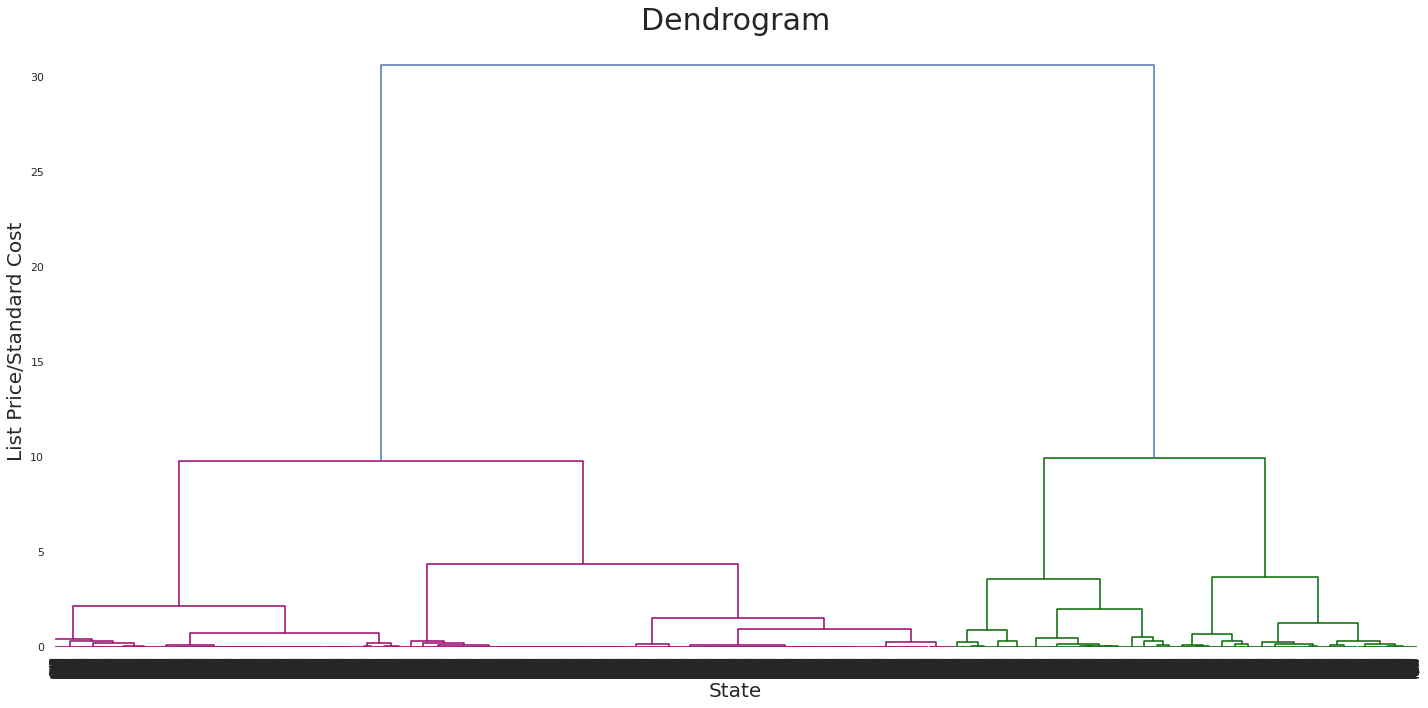

In [108]:
hierarchy.set_link_color_palette(["#990066", "#006600", "#ff8000", " #001a00","#b33c00","#00ffff"])
plt.figure(figsize=(20,10))
plt.title("Dendrogram", fontsize=30)
plt.xlabel("State", fontsize=20)
plt.ylabel("List Price/Standard Cost", fontsize=20)
hierarchy.dendrogram(linkage_matrix, 
         labels=data_normalize.index,
         leaf_rotation=90.,
         leaf_font_size =9.,
         distance_sort = True,
         show_contracted=True
          )
hierarchy.set_link_color_palette(None)
plt.savefig("hierarchy.dendrogram.png")
plt.tight_layout()
plt.show()

In [109]:
data_normalize.index.unique()

Index(['VIC', 'NSW', 'QLD'], dtype='object', name='state')

<AxesSubplot:xlabel='state', ylabel='count'>

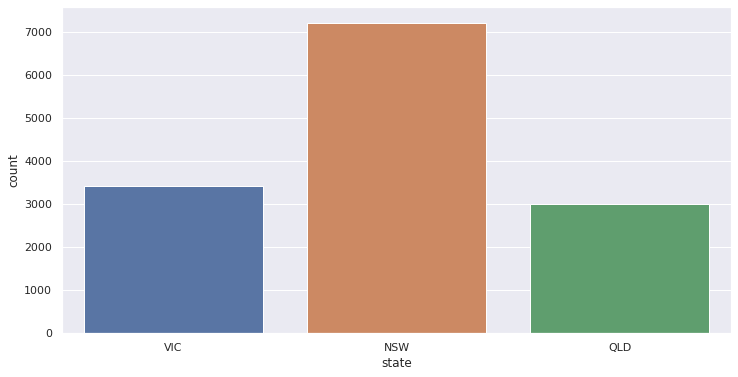

In [110]:
sns.countplot(x=data_normalize.index,data=data_normalize)

# Plot a matrix dataset as a hierarchically-clustered heatmap:

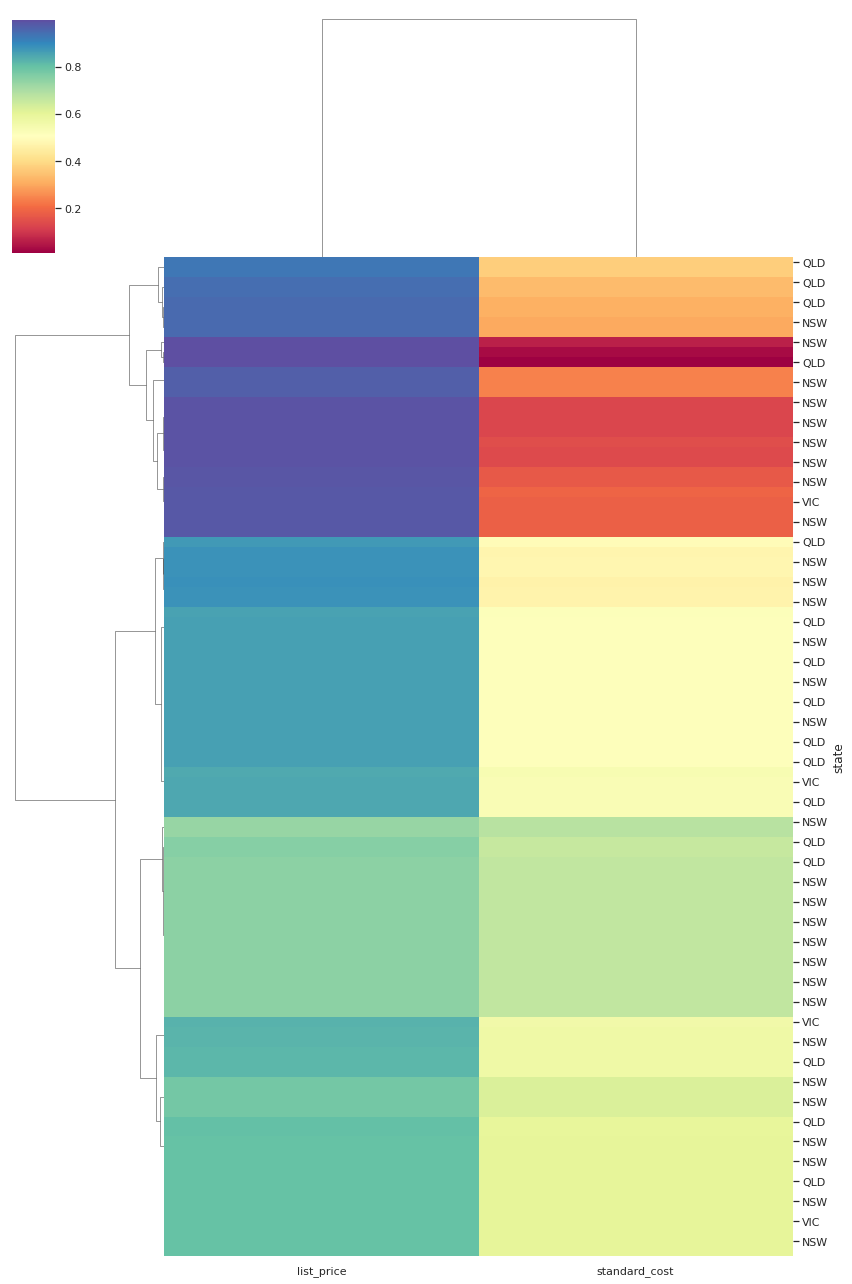

In [111]:
sns.clustermap(data_normalize[:100],method="ward",figsize=(12,18),cmap="Spectral")

In [112]:
clustering = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [113]:
cluster_predict = clustering.fit_predict(data_normalize)

In [114]:
cluster_predict[:40]

array([0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 0, 3, 0, 1, 0,
       3, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 3, 0])

In [115]:
metrics.rand_score(data_normalize.index, cluster_predict)

0.5468359714821417

In [116]:
metrics.adjusted_rand_score(data_normalize.index, cluster_predict)

0.0006567139486338214

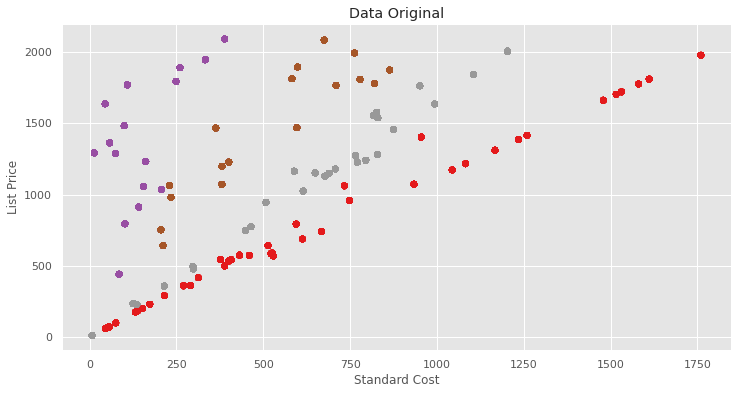

In [117]:
with plt.style.context("ggplot"):
    plt.scatter(x=X["standard_cost"], y=X["list_price"],c=clustering.labels_, cmap="Set1")
    plt.title("Data Original")
    plt.xlabel("Standard Cost")
    plt.ylabel("List Price")
plt.show()

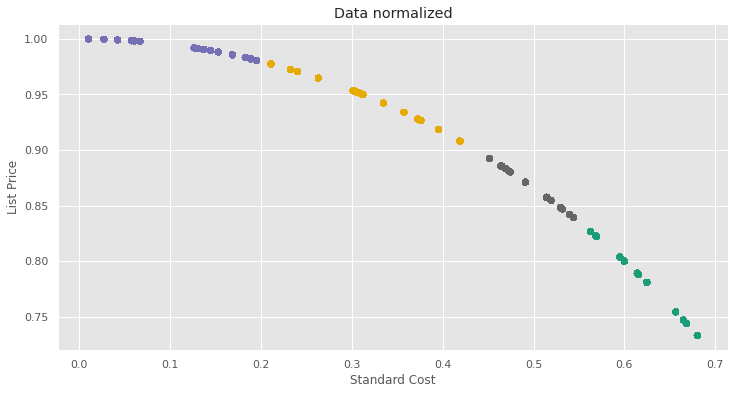

In [118]:
with plt.style.context("ggplot"):
    plt.scatter(x=data_normalize["standard_cost"], y=data_normalize["list_price"],c=clustering.labels_, cmap="Dark2")
    plt.title("Data normalized")
    plt.xlabel("Standard Cost")
    plt.ylabel("List Price")
plt.show()

# Sample Selection to  Customer Segmentation by Job Industry Category :

# Occupational Area

In [119]:
X3 = customers_dataset2.loc[0:4000, ["job_industry_category","brand","wealth_segment"]]
X3.head()

,job_industry_category,brand,wealth_segment
0,Financial Services,Solex,Mass Customer
1,Financial Services,Giant Bicycles,Mass Customer
2,Financial Services,Solex,Mass Customer
3,Health,Trek Bicycles,Mass Customer
4,Health,Giant Bicycles,Mass Customer


In [120]:
X3 = pd.get_dummies(X3, columns=["brand"])

In [121]:
X3 = pd.get_dummies(X3, columns=["wealth_segment"])

In [122]:
X3.index = X3[X3.columns[0]]
X3.sample(n=5)

,job_industry_category,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
job_industry_category,,,,,,,,,,
Health,Health,0,1,0,0,0,0,0,0,1
Manufacturing,Manufacturing,0,1,0,0,0,0,0,1,0
Property,Property,0,0,0,1,0,0,0,0,1
IT,IT,0,0,0,1,0,0,0,1,0
Property,Property,0,0,0,0,0,1,0,0,1


In [123]:
X3 = X3.drop(columns=["job_industry_category"],axis=1)

# For nonquntitative attributes(categorical data), Euclidean distance may not be appropriate.
# Binary: Use Manhattan, Jaccard or Hamming distance
# Computes the Jaccard distance between the points
# In addition, it is sometimes desirable the weight:

In [124]:
Y2 = pdist(X3, 'jaccard');
Z2 = linkage(Y2,'weighted');

In [125]:
[c2,d2] = cophenet(Z2,Y2)
[c2,d2]

[0.9252224159121559,
 array([0.66666667, 0.        , 0.66666667, ..., 0.        , 0.66666667,
        0.66666667])]

In [126]:
linkage_matrix2 = hierarchy.linkage(X3,method="weighted", metric="jaccard")

# Segmentation Demographic 
# Occupation 

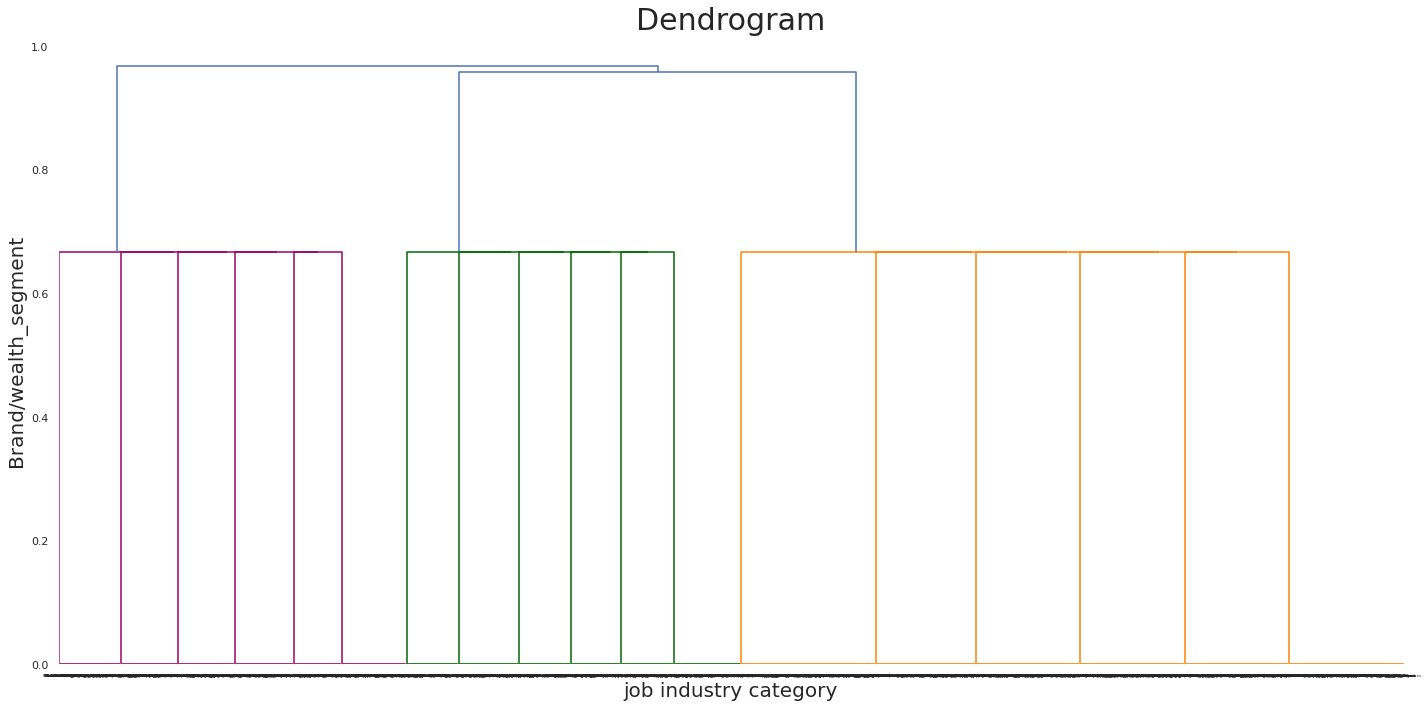

In [127]:
hierarchy.set_link_color_palette(["#990066", "#006600", "#ff8000", "#001a00","#b33c00","#00ffff"])
plt.figure(figsize=(20, 10))
plt.title("Dendrogram", fontsize=30)
plt.xlabel("job industry category", fontsize=20)
plt.ylabel("Brand/wealth_segment", fontsize=20)
hierarchy.dendrogram(linkage_matrix2, 
         labels=X3.index,
         leaf_rotation=360.,
         leaf_font_size =4.,
         count_sort = True,
         orientation ="top",
         #distance_sort = True,
         show_leaf_counts=True,
         show_contracted=True
          )
hierarchy.set_link_color_palette(None)
#plt.savefig("hierarchy.dendrogram.png")
plt.tight_layout()
plt.show()

In [128]:
X3.index.unique()

Index(['Financial Services', 'Health', 'Retail', 'Property', 'Manufacturing',
       'Entertainment', 'IT', 'Argiculture', 'Telecommunications'],
      dtype='object', name='job_industry_category')

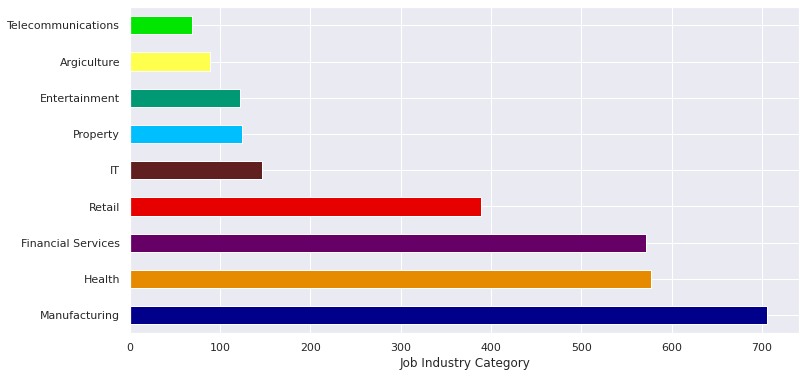

In [129]:
X3.index.value_counts().plot(kind="barh",
                             color=["darkblue","#e68a00","#660066","#e60000","#602020","#00bfff","#009973","#ffff4d","#00e600"])
plt.xlabel("Job Industry Category")
plt.show()

# Clustermap  chart :

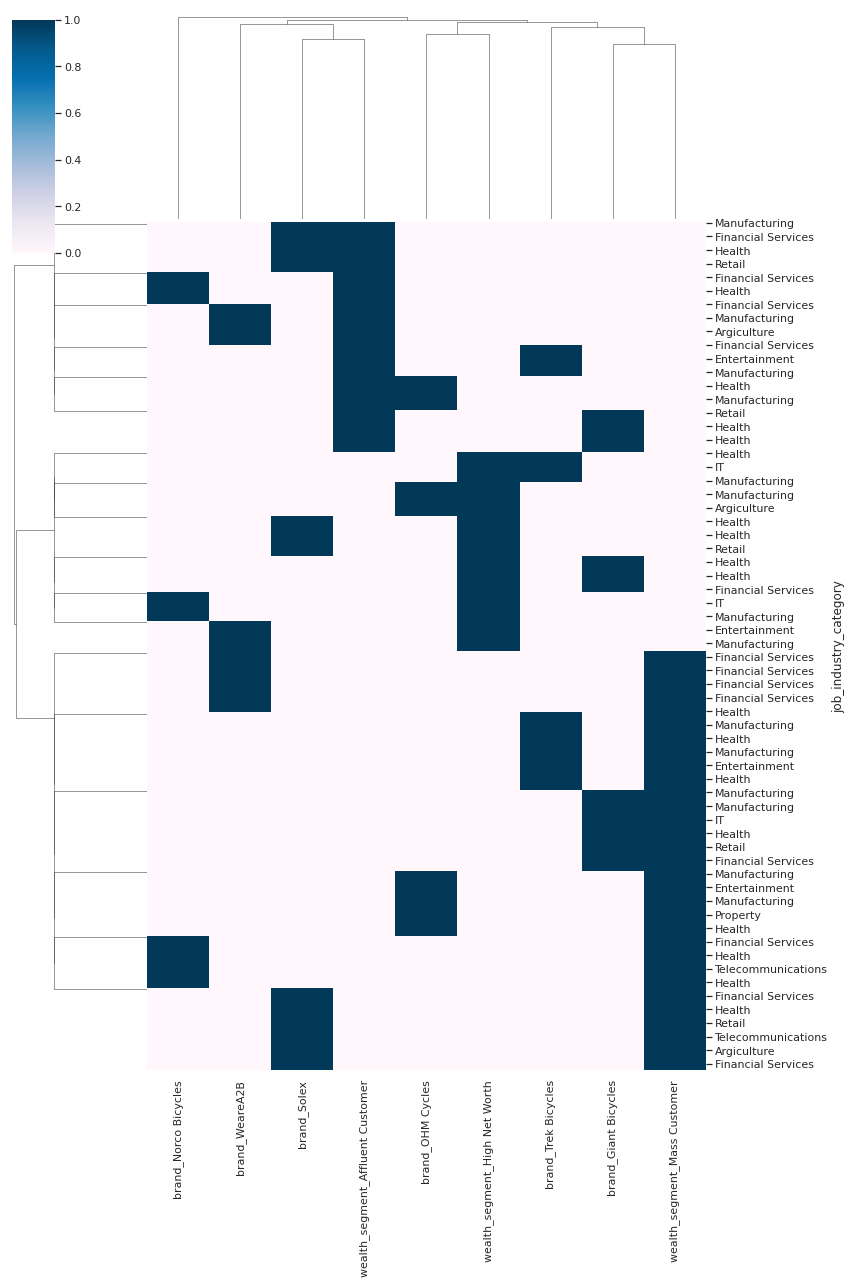

In [130]:
sns.clustermap(X3[0:1000],method="weighted",metric="jaccard",figsize=(12,18),cmap="PuBu")

In [131]:
clustering2 = AgglomerativeClustering(n_clusters = 2, affinity = "jaccard", linkage ="complete")

In [132]:
cluster2_predict = clustering2.fit_predict(X3)

In [133]:
cluster2_predict

array([0, 0, 0, ..., 1, 1, 1])

In [134]:
metrics.rand_score(X3.index, cluster2_predict)

0.4257865750376555

In [135]:
metrics.adjusted_rand_score(X3.index, cluster2_predict)

0.0024357340511328507

# k-Means clustering
k-Means clustering is one of the simplest and most commonly used clustering algorithms. 

It tries to find cluster centers that are representative of certain regions of the
data.

The algorithm alternates between two steps:

assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that
are assigned to it.

In [136]:
cluster3 = customers_dataset2.loc[1000:3000,['age','past_3_years_bike_related_purchases']]

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster3_scaled = scaler.fit_transform(cluster3)

In [138]:
kmeans = KMeans(
    init='k-means++',
    n_clusters=9,
    n_init=10,
    max_iter=300,
    random_state=42
   )

In [139]:
kmeans.fit(cluster3_scaled)

KMeans(n_clusters=9, random_state=42)

In [140]:
print(kmeans.labels_)

[0 0 0 ... 6 6 6]


In [141]:
kmeans_labels = kmeans.fit_predict(cluster3_scaled)

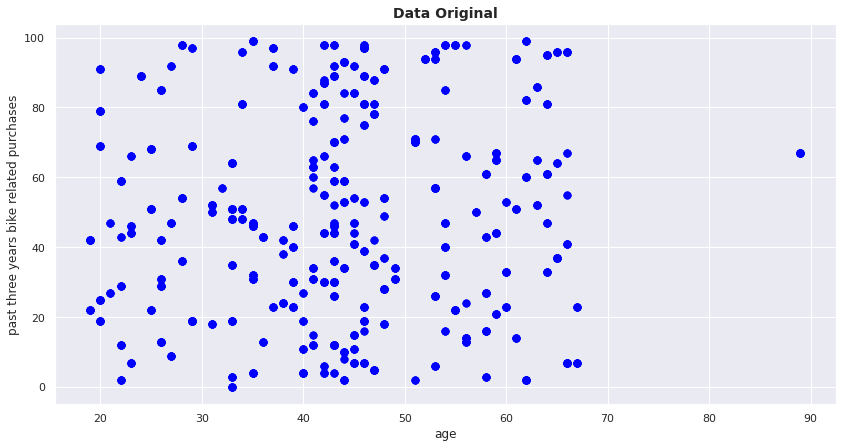

In [142]:
plt.figure(figsize=(14,7))
plt.scatter(customers_dataset2.loc[1000:3000,'age'],customers_dataset2.loc[1000:3000,'past_3_years_bike_related_purchases'], c="blue", cmap="Set1",s=50)
plt.xlabel('age')
plt.ylabel('past three years bike related purchases')
plt.title('Data Original',fontsize=14, fontweight='bold')
plt.show()

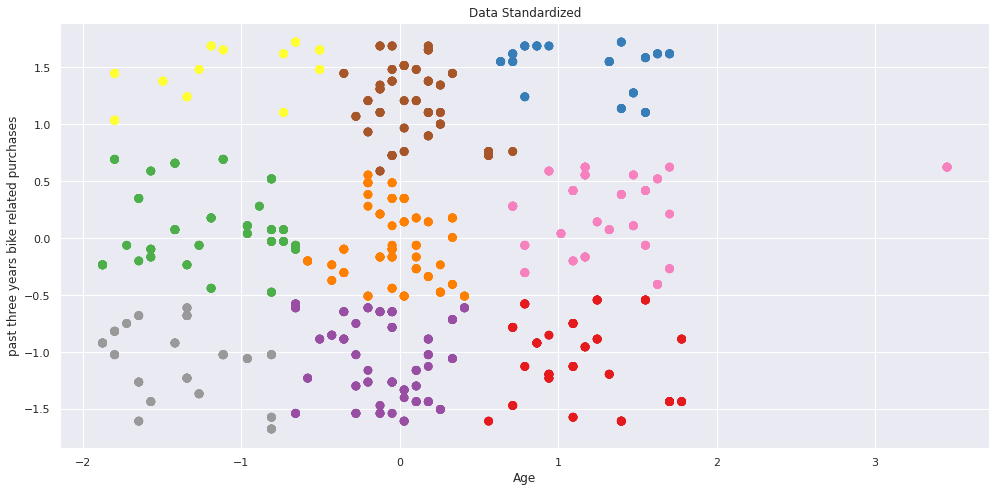

In [143]:
plt.figure(figsize=(14,7))
plt.scatter(cluster3_scaled[:, 0], cluster3_scaled[:, 1], c=kmeans.labels_, cmap="Set1", s=60)
plt.title("Data Standardized")
plt.xlabel("Age")
plt.ylabel("past three years bike related purchases")
plt.tight_layout()
plt.show()

In [144]:
new_customer_list_dataset = pd.read_excel("../input/kpmg-virtual-internship-program/KPMG.xlsx",engine="openpyxl", sheet_name="NewCustomerList")

In [145]:
new_customer_list_dataset.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
new_customer_list_dataset = new_customer_list_dataset.drop(new_customer_list_dataset.iloc[:,16:256], axis=1)

In [147]:
new_customer_list_dataset.info

<bound method DataFrame.info of     first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
995  Ferdinand  Romanetti    Male                                   60   
996       Burk    Wortley    Male                                   22   
997   Melloney      Temby  Female                                   17   
998     Dickie    Cubbini    Male                                   30   
999      Sylas    Duffill    Male                                   56   

           DOB                     job_title job_industry_category  \
0   1957-

In [148]:
new_customer_list_dataset.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

# Handling Missing Values replace with 0 

In [149]:
new_customer_list_dataset = new_customer_list_dataset.fillna(0)

In [150]:
new_customer_list_dataset.isna().any()

first_name                             False
last_name                              False
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_industry_category                  False
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
dtype: bool

In [151]:
new_customer_list_dataset.duplicated().any()

False

In [152]:
new_customer_list_dataset.dtypes

first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases     int64
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
owns_car                               object
tenure                                  int64
address                                object
postcode                                int64
state                                  object
country                                object
property_valuation                      int64
dtype: object